Linear Regression ödevi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
veri = pd.read_csv("/content/odev_tenis.csv")

In [ ]:
veri

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
#humidity tahmin ediyoruz

In [ ]:
#categoric >>> numerical



In [ ]:
#outlook
veri = pd.get_dummies(veri)

In [ ]:
veri

,temperature,humidity,windy,outlook_overcast,outlook_rainy,outlook_sunny,play_no,play_yes
0,85,85,False,0,0,1,1,0
1,80,90,True,0,0,1,1,0
2,83,86,False,1,0,0,0,1
3,70,96,False,0,1,0,0,1
4,68,80,False,0,1,0,0,1
5,65,70,True,0,1,0,1,0
6,64,65,True,1,0,0,0,1
7,72,95,False,0,0,1,1,0
8,69,70,False,0,0,1,0,1
9,75,80,False,0,1,0,0,1


In [ ]:
#play_yes bizim istediğimiz veri, o yüzden play_no'ya ihtiyacımız yok
veri = veri.drop(["play_no"], axis=1)
veri

,temperature,humidity,windy,outlook_overcast,outlook_rainy,outlook_sunny,play_yes
0,85,85,False,0,0,1,0
1,80,90,True,0,0,1,0
2,83,86,False,1,0,0,1
3,70,96,False,0,1,0,1
4,68,80,False,0,1,0,1
5,65,70,True,0,1,0,0
6,64,65,True,1,0,0,1
7,72,95,False,0,0,1,0
8,69,70,False,0,0,1,1
9,75,80,False,0,1,0,1


In [ ]:
#windy
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(veri["windy"])
w

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
veri["windy"] = w

In [ ]:
veri.rename(columns= {"play_yes": "play"}, inplace= True)

In [ ]:
veri

,temperature,humidity,windy,outlook_overcast,outlook_rainy,outlook_sunny,play_target
0,85,85,0,0,0,1,0
1,80,90,1,0,0,1,0
2,83,86,0,1,0,0,1
3,70,96,0,0,1,0,1
4,68,80,0,0,1,0,1
5,65,70,1,0,1,0,0
6,64,65,1,1,0,0,1
7,72,95,0,0,0,1,0
8,69,70,0,0,0,1,1
9,75,80,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(veri)

In [ ]:
scaled_data

array([[1.        , 0.64516129, 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.76190476, 0.80645161, 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.9047619 , 0.67741935, 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.28571429, 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [0.19047619, 0.48387097, 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [0.04761905, 0.16129032, 1.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.38095238, 0.96774194, 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.23809524, 0.16129032, 0.        , 0.        , 0.        ,
        1.        , 1.        ],
       [0.52380952, 0.48387097, 0.        , 0.        , 1.        ,
        0.        , 1. 

In [ ]:
target = veri["humidity"]
x = veri.drop(["humidity"], axis=1)

In [ ]:
target

0     85
1     90
2     86
3     96
4     80
5     70
6     65
7     95
8     70
9     80
10    70
11    90
12    75
13    91
Name: humidity, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size= 0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_test)

In [ ]:
y_test

4     80
11    90
2     86
0     85
8     70
Name: humidity, dtype: int64

In [ ]:
y_hat

array([84.80538754, 63.69876213, 78.93733296, 99.03354902, 84.77394852])

I don't approve this part, partly because they're adding beta0 manually and using p-value.

In [ ]:
#backward elimination with p-value, r2 and adjusted r2
import statsmodels.api as sm
X = np.append(arr= np.ones((14,1)).astype(int), values= veri, axis=1)

X_l = veri.iloc[:, [0,1,2,3,4,5]].values
X_l = np.array(X_l, dtype= float)
model = sm.OLS(target, X_l).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.744e+27
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          1.04e-108
Time:                        06:19:55   Log-Likelihood:                 386.99
No. Observations:                  14   AIC:                            -762.0
Df Residuals:                       8   BIC:                            -758.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.665e-15   1.75e-14      0.152      0.8

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#find mape mse mre

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_hat)

13.395357996905352

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

235.9876362801994

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_hat)

0.1621168679982396

In [ ]:
#write some automation code for feature elimination

In [ ]:
#try to add visualization with PCA or something

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_data = pca.fit_transform(X)


In [ ]:
pca_data

array([[ -6.58977006],
       [ -9.88377108],
       [ -6.93107227],
       [-12.66795137],
       [  3.20832843],
       [ 13.64201528],
       [ 18.73743584],
       [-12.31889601],
       [ 12.46697908],
       [  1.14833949],
       [ 10.71326243],
       [ -7.50388651],
       [  4.16779768],
       [ -8.18881092]])

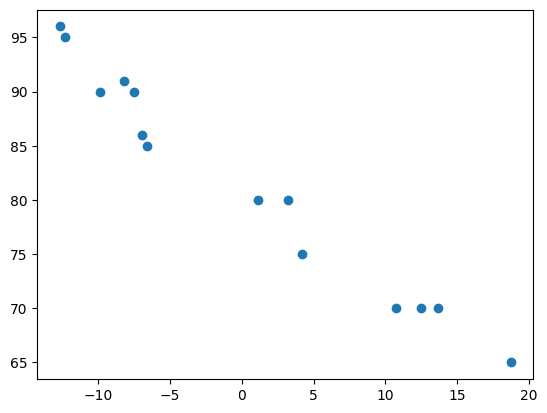

In [ ]:
plt.scatter(pca_data, target)

In [ ]:
#plt.plot(yhat)

In [ ]:
#also implement some model interpretation techniques like feature effect, interaction and maybe model-agnostic ones